The Python code for function $x**4 - 4x**2 +3x$looks like this:

In [1]:
def p(x):
    return x**4 - 4*x**2 + 3*x

for x in [-1, 0, 2, 3.4]:
    print(x, p(x))

-1 -6
0 0
2 6
3.4 97.59359999999998


We can plot the function in a simple way with Matplotlib:

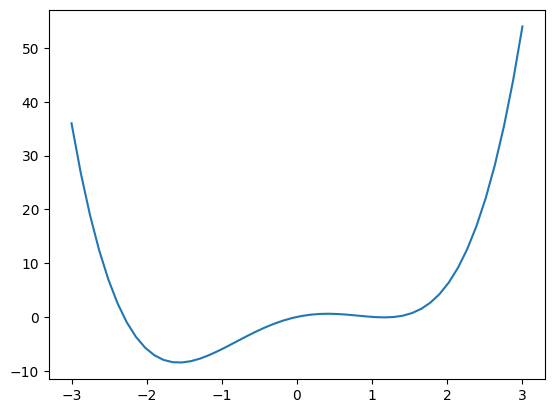

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 50, endpoint=True)
F = p(X)
plt.plot(X,F)

plt.show()

A polynomial is uniquely determined by its coefficients. This means, an instance of our polynomial class needs a list or tuple to define the coefficients.

In [9]:
class Polynomial:
    
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
        """
        return "Polynomial" + str(tuple(self.coefficients))

    def __call__(self, x):    
        res = 0
        for index, coeff in enumerate(self.coefficients[::-1]):
            res += coeff * x** index
        return res
    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

In [5]:
p = Polynomial(1, 0, -4, 3, 0)
print(p)

Polynomial(1, 0, -4, 3, 0)


In [6]:
p2 = eval(repr(p))
print(p2)

Polynomial(1, 0, -4, 3, 0)


In [8]:
polys = [Polynomial(1, 0, -4, 3, 0),
         Polynomial(2, 0),
         Polynomial(4, 1, -1),
         Polynomial(3, 0, -5, 2, 7),
         Polynomial(-42)]

# output suitable for usage in LaTeX:
for count, poly in enumerate(polys):
    print(f"$p_{count} = {str(poly)}$")

$p_0 = x^4-4x^2+3x$
$p_1 = 2x$
$p_2 = 4x^2+x-1$
$p_3 = 3x^4-5x^2+2x+7$
$p_4 = -42$


In [10]:
p = Polynomial(3, 0, -5, 2, 1)
print(p)

3x^4-5x^2+2x+1


In [11]:
for x in range(-3, 3):
    print(x, p(x))

-3 193
-2 25
-1 -3
0 1
1 1
2 33


In [12]:
coefficients = [3, 0, -5, 2, 1]
print(coefficients[::-1])

[1, 2, -5, 0, 3]
